In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_recall_fscore_support

In [ ]:
# load dataset
from google.colab import drive

drive.mount('/drive')
data = pd.read_csv('/drive/My Drive/Colab Notebooks/LungCancerDataset.csv')
data.head()

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [ ]:
null_perc=data.isnull().sum()/len(data)*100
null=data.isnull().sum()
overview=pd.concat((null,null_perc,data.nunique()),axis=1, keys=['Null counts','Null %','Cardinality'])
overview

,Null counts,Null %,Cardinality
GENDER,0,0.0,2
AGE,0,0.0,39
SMOKING,0,0.0,2
YELLOW_FINGERS,0,0.0,2
ANXIETY,0,0.0,2
PEER_PRESSURE,0,0.0,2
CHRONIC DISEASE,0,0.0,2
FATIGUE,0,0.0,2
ALLERGY,0,0.0,2
WHEEZING,0,0.0,2


In [ ]:
data['GENDER'].replace(['M', 'F'], [0, 1], inplace=True)
data['LUNG_CANCER'].replace(['YES', 'NO'], [0, 1], inplace=True)
data.drop_duplicates(inplace=True)
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,0
1,0,74,2,1,1,1,2,2,2,1,1,1,2,2,2,0
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,1
3,0,63,2,2,2,1,1,1,1,1,2,1,1,2,2,1
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,1


In [ ]:
y = data['LUNG_CANCER']
X = data.drop('LUNG_CANCER',axis=1)

for i in X.columns[2:]:
    temp=[]
    for j in X[i]:
        temp.append(j-1)
    X[i]=temp
X.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,0,69,0,1,1,0,0,1,0,1,1,1,1,1,1
1,0,74,1,0,0,0,1,1,1,0,0,0,1,1,1
2,1,59,0,0,0,1,0,1,0,1,0,1,1,0,1
3,0,63,1,1,1,0,0,0,0,0,1,0,0,1,1
4,1,63,0,1,0,0,0,0,0,1,0,1,1,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state = 42)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
X_train,y_train=RandomOverSampler().fit_resample(X_train,y_train)

In [ ]:
X.shape

(276, 15)

In [ ]:
scaler = StandardScaler()
X_train['AGE'] = scaler.fit_transform(X_train[['AGE']])
X_val['AGE'] = scaler.fit_transform(X_val[['AGE']])
X_test['AGE'] = scaler.transform(X_test[['AGE']])

X_train

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,1.080441,0,1,0,0,0,1,0,1,1,1,1,0,0
1,0,-0.570098,0,1,1,0,0,1,0,1,1,1,1,1,1
2,1,1.080441,0,1,1,1,1,1,0,0,0,0,0,0,0
3,0,0.844650,1,0,0,0,0,1,0,1,1,1,1,0,1
4,0,-0.923785,0,1,0,0,0,1,0,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,0,-0.923785,0,1,0,0,0,1,0,1,1,1,1,0,0
288,0,-0.923785,1,0,0,0,0,1,1,0,0,0,1,0,1
289,0,0.019380,1,1,1,0,0,0,0,0,1,0,0,1,1
290,1,-0.452203,1,0,0,0,1,1,1,0,0,0,1,0,0


In [ ]:
from tensorflow.keras import initializers

model = Sequential(
    [
        Dense(3, activation = 'relu', input_shape=[15]),
        #Dense(3, activation = 'sigmoid'),
        Dense(1, activation = 'sigmoid'),
    ]
)

In [ ]:
model.build()

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 3)                 48        
                                                                 
 dense_5 (Dense)             (None, 1)                 4         
                                                                 
Total params: 52
Trainable params: 52
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0015),
    metrics=['accuracy']
)

history = model.fit(X_train, y_train, 
                        epochs=150, batch_size=16,
                        validation_data=(X_val, y_val), 
                        shuffle=True)

Epoch 1/150
19/19 [==============================] - 1s 19ms/step - loss: 1.1369 - accuracy: 0.4349 - val_loss: 1.4647 - val_accuracy: 0.2364
Epoch 2/150
19/19 [==============================] - 0s 7ms/step - loss: 0.9554 - accuracy: 0.4007 - val_loss: 1.1452 - val_accuracy: 0.3091
Epoch 3/150
19/19 [==============================] - 0s 5ms/step - loss: 0.8433 - accuracy: 0.4007 - val_loss: 0.9229 - val_accuracy: 0.4727
Epoch 4/150
19/19 [==============================] - 0s 5ms/step - loss: 0.7651 - accuracy: 0.4863 - val_loss: 0.7887 - val_accuracy: 0.5273
Epoch 5/150
19/19 [==============================] - 0s 6ms/step - loss: 0.7220 - accuracy: 0.5377 - val_loss: 0.7073 - val_accuracy: 0.6182
Epoch 6/150
19/19 [==============================] - 0s 7ms/step - loss: 0.6962 - accuracy: 0.5308 - val_loss: 0.6560 - val_accuracy: 0.6727
Epoch 7/150
19/19 [==============================] - 0s 5ms/step - loss: 0.6766 - accuracy: 0.5274 - val_loss: 0.6065 - val_accuracy: 0.7273
Epoch 8/150


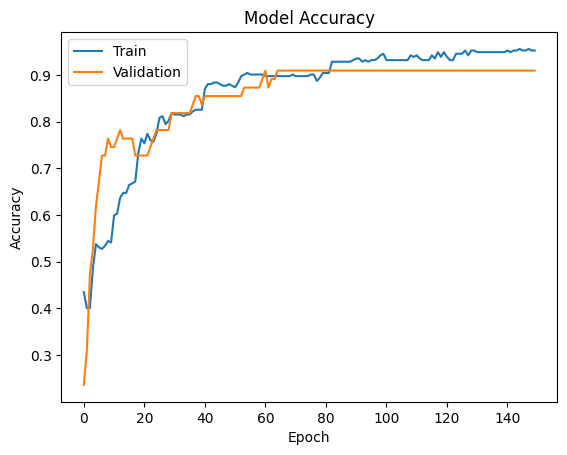

In [ ]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Model Accuracy')
plt.legend(loc='upper left')

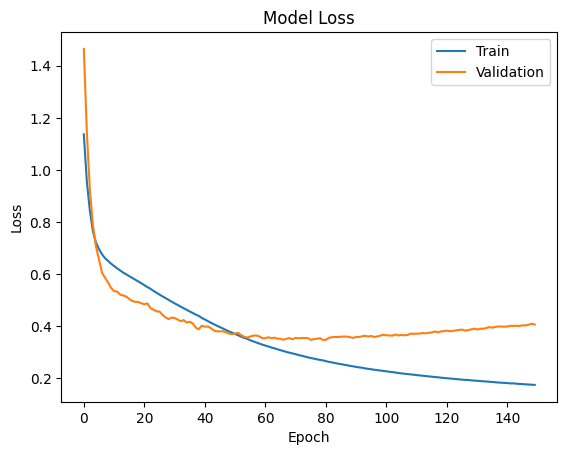

In [ ]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Model Loss')
plt.legend(loc='upper right')

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

2/2 [==============================] - 0s 7ms/step - loss: 0.2670 - accuracy: 0.9286
Test loss: 0.2670181691646576
Test accuracy: 0.9285714030265808


2/2 [==============================] - 0s 7ms/step

Confusion Matrix


Text(50.722222222222214, 0.5, 'True')

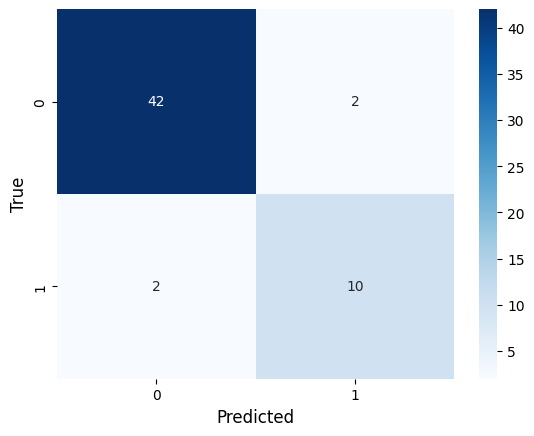

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
y_true = y_test
y_pred = model.predict(X_test)

# Make the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_true.round(), y_pred.round())
print("\nConfusion Matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

In [ ]:
print(classification_report(y_true.round(),y_pred.round()))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        44
           1       0.83      0.83      0.83        12

    accuracy                           0.93        56
   macro avg       0.89      0.89      0.89        56
weighted avg       0.93      0.93      0.93        56



In [ ]:
print(model.trainable_variables) 

[<tf.Variable 'dense_24/kernel:0' shape=(15, 3) dtype=float32, numpy=
array([[ 0.5376799 , -0.27532595, -0.19433893],
       [-0.33995485,  0.3302112 ,  1.0131334 ],
       [ 0.9206607 ,  0.68551254,  0.66253835],
       [-0.15585123,  0.5709573 ,  0.73965585],
       [-0.44369182,  1.1467572 , -0.3688268 ],
       [-0.7377526 ,  0.9536515 , -0.51646966],
       [-0.43890578,  1.0386015 ,  0.04370645],
       [-0.45076963, -0.28451216, -0.7528845 ],
       [ 0.31138924,  1.4373646 , -0.08710353],
       [-0.47709665, -0.03148007, -0.03745081],
       [-0.22027783,  0.9978563 ,  0.03788532],
       [-0.7327695 ,  0.35907233, -0.38978517],
       [-0.49851188,  0.11375055, -1.1778032 ],
       [ 0.41412494,  0.95049226,  0.08540486],
       [ 0.14797132,  0.22905709,  0.5227116 ]], dtype=float32)>, <tf.Variable 'dense_24/bias:0' shape=(3,) dtype=float32, numpy=array([ 0.832233  , -0.92078173,  0.5305679 ], dtype=float32)>, <tf.Variable 'dense_25/kernel:0' shape=(3, 1) dtype=float32, nump

In [ ]:
!mkdir -p saved_model
model.save('saved_model/my_model2')

In [ ]:
model.save('my_model.h5')

In [ ]:
from google.colab import files

files.download('my_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
new_model = tf.keras.models.load_model('my_model.h5')

In [ ]:
loss, acc = new_model.evaluate(X_test, y_test, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

2/2 - 0s - loss: 0.2670 - accuracy: 0.9286 - 179ms/epoch - 90ms/step
Restored model, accuracy: 92.86%
